In [1]:
# fit() - learns parameters from train set
# transform() - transforms data

# One Hot Encoding 

In [2]:
pwd

'C:\\Users\\Administrator'

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# For on hot encoding with sklearn
from sklearn.preprocessing import OneHotEncoder

# For on hot encoding with feature engine
from feature_engine.encoding import OneHotEncoder as fe_OneHotEncoder

In [4]:
data = pd.read_csv('datasets/titanic/titanic.csv')

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Survived is the target or the dependent variable
data_cat = pd.read_csv('datasets/titanic/titanic.csv', usecols=['Sex','Embarked','Cabin','Survived'])

In [7]:
data_cat.head()

,Survived,Sex,Cabin,Embarked
0,0,male,NaN,S
1,1,female,C85,C
2,1,female,NaN,S
3,1,female,C123,S
4,0,male,NaN,S


In [8]:
# Getting only the 1st charcter of the Cabin Data
data_cat['Cabin']= data_cat['Cabin'].str[0]

In [9]:
data_cat.head()

,Survived,Sex,Cabin,Embarked
0,0,male,NaN,S
1,1,female,C,C
2,1,female,NaN,S
3,1,female,C,S
4,0,male,NaN,S


# Encoding important
Just like imputation, all methods of categorical encoding should be performed over the training set, and then propagated to the test set.

Why?

Because these methods will "learn" patterns from the train data, and therefore you want to avoid leaking information and overfitting. But more importantly, because we don't know whether in future / live data, we will have all the categories present in the train data, or if there will be more or less categories. Therefore, we want to anticipate this uncertainty by setting the right processes right from the start. We want to create transformers that learn the categories from the train set, and used those learned categories to create the dummy variables in both train and test sets.

In [10]:
# Lets seprate data into training & test
X_train, X_test, y_train, y_test = train_test_split(
    data_cat[['Sex','Embarked','Cabin']], # Predictors or independent variables
    data_cat['Survived'],# Target
    test_size = 0.3, # Number of observations in the test set
    random_state = 0) # seed to ensure reproducibility 


X_train.shape, X_test.shape

((623, 3), (268, 3))

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 857 to 684
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sex       623 non-null    object
 1   Embarked  621 non-null    object
 2   Cabin     152 non-null    object
dtypes: object(3)
memory usage: 19.5+ KB


# Finding out the cardinality in the predictors


In [12]:
X_train['Sex'].unique()
# Gender has two labels

array(['male', 'female'], dtype=object)

In [13]:
X_train['Embarked'].unique()
# Embarked has 3 labels & a missing value

array(['S', 'C', 'Q', nan], dtype=object)

In [14]:
X_train['Cabin'].unique()
# Cabin has 8 labels and missing data

array(['E', 'D', nan, 'B', 'C', 'A', 'F', 'G', 'T'], dtype=object)

# One hot encoding with pandas¶
#### Advantages
quick
returns pandas dataframe
returns feature names for the dummy variables

#### Limitations of pandas:
it does not preserve information from train data to propagate to test data
The pandas method get_dummies(), will create as many binary variables as categories in the variable:

If the variable colour has 3 categories in the train data, it will create 2 dummy variables. However, if the variable colour has 5 categories in the test data, it will create 4 binary variables, therefore train and test sets will end up with different number of features and will be incompatible with training and scoring using Scikit-learn.

In practice, we shouldn't be using get-dummies in our machine learning pipelines. It is however useful, for a quick data exploration. Let's look at this with examples.

#### Into K dummy variables

In [15]:
# We can create dummy variables with builtin pandas get_dummy
tmp = pd.get_dummies(X_train['Sex'])
tmp.head()


,female,male
857,0,1
52,1,0
386,0,1
124,0,1
578,1,0


In [16]:
# for better visualisation let's put the dummies next
# to the original variable
pd.concat([X_train['Sex'],
          pd.get_dummies(X_train['Sex'])], axis = 1).head()

,Sex,female,male
857,male,0,1
52,female,1,0
386,male,0,1
124,male,0,1
578,female,1,0


In [17]:
# and now let's repeat for embarked

tmp = pd.get_dummies(X_train['Embarked'])

tmp.head()

,C,Q,S
857,0,0,1
52,1,0,0
386,0,0,1
124,0,0,1
578,1,0,0


In [18]:
# for better visualisation

pd.concat([X_train['Embarked'],
           pd.get_dummies(X_train['Embarked'])], axis=1).head()

,Embarked,C,Q,S
857,S,0,0,1
52,C,1,0,0
386,S,0,0,1
124,S,0,0,1
578,C,1,0,0


In [19]:

# and now for cabin

tmp = pd.get_dummies(X_train['Cabin'])

tmp.head()

,A,B,C,D,E,F,G,T
857,0,0,0,0,1,0,0,0
52,0,0,0,1,0,0,0,0
386,0,0,0,0,0,0,0,0
124,0,0,0,1,0,0,0,0
578,0,0,0,0,0,0,0,0


In [20]:
# and now for all variables together: train set

tmp = pd.get_dummies(X_train)

print(tmp.shape)

tmp.head()

(623, 13)


,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
857,0,1,0,0,1,0,0,0,0,1,0,0,0
52,1,0,1,0,0,0,0,0,1,0,0,0,0
386,0,1,0,0,1,0,0,0,0,0,0,0,0
124,0,1,0,0,1,0,0,0,1,0,0,0,0
578,1,0,1,0,0,0,0,0,0,0,0,0,0


In [21]:

# and now for all variables together: test set

tmp = pd.get_dummies(X_test)

print(tmp.shape)

tmp.head()

(268, 12)


,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G
495,0,1,1,0,0,0,0,0,0,0,0,0
648,0,1,0,0,1,0,0,0,0,0,0,0
278,0,1,0,1,0,0,0,0,0,0,0,0
31,1,0,1,0,0,0,1,0,0,0,0,0
255,1,0,1,0,0,0,0,0,0,0,0,0


# Notice the positives of pandas get_dummies:

dataframe returned with feature names


## And the limitations:

The train set contains 13 dummy features, whereas the test set contains 12 features. This occurred because there was no category T in cabin in the test set.

This will cause problems if training and scoring models with scikit-learn, because predictors require train and test sets to be of the same shape.

# K-1 for Hot Encoding

In [22]:

# obtaining k-1 labels: we need to indicate get_dummies
# to drop the first binary variable

tmp = pd.get_dummies(X_train['Sex'], drop_first=True)
tmp.head()

,male
857,1
52,0
386,1
124,1
578,0


In [23]:
# obtaining k-1 labels: we need to indicate get_dummies
# to drop the first binary variable

tmp = pd.get_dummies(X_train['Embarked'], drop_first=True)

tmp.head()

,Q,S
857,0,1
52,0,0
386,0,1
124,0,1
578,0,0


For embarked, if an observation shows 0 for Q and S, then its value must be C, the remaining category.

Caveat, this variable has missing data, so unless we encode missing data as well, all the information contained in the variable is not captured.

In [24]:

# altogether: train set

tmp = pd.get_dummies(X_train, drop_first=True)

print(tmp.shape)

tmp.head()

(623, 10)


,Sex_male,Embarked_Q,Embarked_S,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T
857,1,0,1,0,0,0,1,0,0,0
52,0,0,0,0,0,1,0,0,0,0
386,1,0,1,0,0,0,0,0,0,0
124,1,0,1,0,0,1,0,0,0,0
578,0,0,0,0,0,0,0,0,0,0


In [25]:
# altogether: test set

tmp = pd.get_dummies(X_test, drop_first=True)

print(tmp.shape)

tmp.head()

(268, 9)


,Sex_male,Embarked_Q,Embarked_S,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G
495,1,0,0,0,0,0,0,0,0
648,1,0,1,0,0,0,0,0,0
278,1,1,0,0,0,0,0,0,0
31,0,0,0,1,0,0,0,0,0
255,0,0,0,0,0,0,0,0,0


### Bonus: get_dummies() can handle missing values¶


In [26]:
# we can add an additional dummy variable to indicate
# missing data

pd.get_dummies(X_train['Embarked'], drop_first=True, dummy_na=True).head()

,Q,S,NaN
857,0,1,0
52,0,0,0
386,0,1,0
124,0,1,0
578,0,0,0


# One hot encoding with Scikit-learn¶
### Advantages
quick
Creates the same number of features in train and test set
### Limitations
it returns a numpy array instead of a pandas dataframe
it does not return the variable names, therefore inconvenient for variable exploration

In [27]:
# Dense matrix - most of the values are not zero
# Sparse matrix - most of the values arezero
encoder = OneHotEncoder(
    categories='auto',
    drop='first',# to return k-1, use False to return  k dummies
    sparse = False,
    handle_unknown='error'
)

In [28]:
help(OneHotEncoder)

Help on class OneHotEncoder in module sklearn.preprocessing._encoders:

class OneHotEncoder(_BaseEncoder)
 |  OneHotEncoder(*, categories='auto', drop=None, sparse=True, dtype=<class 'numpy.float64'>, handle_unknown='error')
 |  
 |  Encode categorical features as a one-hot numeric array.
 |  
 |  The input to this transformer should be an array-like of integers or
 |  strings, denoting the values taken on by categorical (discrete) features.
 |  The features are encoded using a one-hot (aka 'one-of-K' or 'dummy')
 |  encoding scheme. This creates a binary column for each category and
 |  returns a sparse matrix or dense array (depending on the ``sparse``
 |  parameter)
 |  
 |  By default, the encoder derives the categories based on the unique values
 |  in each feature. Alternatively, you can also specify the `categories`
 |  manually.
 |  
 |  This encoding is needed for feeding categorical data to many scikit-learn
 |  estimators, notably linear models and SVMs with the standard ker

# fit method

In a nutshell: fitting is equal to training. Then, after it is trained, the model can be used to make predictions, usually with a .predict() method call.

To elaborate: Fitting your model to (i.e. using the .fit() method on) the training data is essentially the training part of the modeling process. It finds the coefficients for the equation specified via the algorithm being used (take for example umutto's linear regression example, above).

Then, for a classifier, you can classify incoming data points (from a test set, or otherwise) using the predict method. Or, in the case of regression, your model will interpolate/extrapolate when predict is used on incoming data points.

fitting means training. There is a fit function in ML, that is used for training of model using data examples. Fit function adjusts weights according to data values so that better accuracy can be achieved. After training, the model can be used for predictions, using .predict() method call. 

In [29]:
encoder.fit(X_train.fillna('Missing'))

OneHotEncoder(drop='first', sparse=False)

In [30]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [3]:
# We observe the learned categories
encoder.categories_

NameError: name 'encoder' is not defined

In [32]:
# transform the train set

tmp = encoder.transform(X_train.fillna('Missing'))

pd.DataFrame(tmp).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [33]:
# we can now retrieve the feature names as follows:

encoder.get_feature_names()

array(['x0_male', 'x1_Missing', 'x1_Q', 'x1_S', 'x2_B', 'x2_C', 'x2_D',
       'x2_E', 'x2_F', 'x2_G', 'x2_Missing', 'x2_T'], dtype=object)

In [34]:
# we can go ahead and transfom the test set
# and then reconstitute it back to a pandas dataframe
# and add the feature names derived by OHE

tmp = encoder.transform(X_test.fillna('Missing'))

tmp = pd.DataFrame(tmp)
tmp.columns = encoder.get_feature_names()

tmp.head()

,x0_male,x1_Missing,x1_Q,x1_S,x2_B,x2_C,x2_D,x2_E,x2_F,x2_G,x2_Missing,x2_T
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
#We can see that train and test contain the same number of features.

# One hot encoding with Feature-Engine
## Advantages
quick
returns dataframe
returns feature names
allows to select features to encode
## Limitations
Not sure yet.

In [36]:
ohe_enc = fe_OneHotEncoder(
    top_categories=None,
    variables=['Sex', 'Embarked'],  # we can select which variables to encode
    drop_last=True)  # to return k-1, false to return k


ohe_enc.fit(X_train.fillna('Missing'))

OneHotEncoder(drop_last=True, variables=['Sex', 'Embarked'])

In [37]:
tmp = ohe_enc.transform(X_train.fillna('Missing'))

tmp.head()

,Cabin,Sex_male,Embarked_S,Embarked_C,Embarked_Q
857,E,1,1,0,0
52,D,0,0,1,0
386,Missing,1,1,0,0
124,D,1,1,0,0
578,Missing,0,0,1,0


Note how feature-engine returns the dummy variables with their names, and drops the original variable, leaving the dataset ready for further exploration or building machine learning models.

In [38]:
tmp = ohe_enc.transform(X_test.fillna('Missing'))

tmp.head()

,Cabin,Sex_male,Embarked_S,Embarked_C,Embarked_Q
495,Missing,1,0,1,0
648,Missing,1,1,0,0
278,Missing,1,0,0,1
31,B,0,0,1,0
255,Missing,0,0,1,0


In [39]:
# Feature-Engine's one hot encoder also selects
# all categorical variables automatically

ohe_enc = fe_OneHotEncoder(
    top_categories=None,
    drop_last=True)  # to return k-1, false to return k


ohe_enc.fit(X_train.fillna('Missing'))

OneHotEncoder(drop_last=True, variables=['Sex', 'Embarked', 'Cabin'])

In [40]:
ohe_enc.variables

['Sex', 'Embarked', 'Cabin']

In [41]:
tmp = ohe_enc.transform(X_train.fillna('Missing'))

tmp.head()

,Sex_male,Embarked_S,Embarked_C,Embarked_Q,Cabin_E,Cabin_D,Cabin_Missing,Cabin_B,Cabin_C,Cabin_A,Cabin_F,Cabin_G
857,1,1,0,0,1,0,0,0,0,0,0,0
52,0,0,1,0,0,1,0,0,0,0,0,0
386,1,1,0,0,0,0,1,0,0,0,0,0
124,1,1,0,0,0,1,0,0,0,0,0,0
578,0,0,1,0,0,0,1,0,0,0,0,0


In [42]:
tmp.tail()

,Sex_male,Embarked_S,Embarked_C,Embarked_Q,Cabin_E,Cabin_D,Cabin_Missing,Cabin_B,Cabin_C,Cabin_A,Cabin_F,Cabin_G
835,0,0,1,0,1,0,0,0,0,0,0,0
192,0,1,0,0,0,0,1,0,0,0,0,0
629,1,0,0,1,0,0,1,0,0,0,0,0
559,0,1,0,0,0,0,1,0,0,0,0,0
684,1,1,0,0,0,0,1,0,0,0,0,0


In [43]:
tmp = ohe_enc.transform(X_test.fillna('Missing'))

tmp.head()

,Sex_male,Embarked_S,Embarked_C,Embarked_Q,Cabin_E,Cabin_D,Cabin_Missing,Cabin_B,Cabin_C,Cabin_A,Cabin_F,Cabin_G
495,1,0,1,0,0,0,1,0,0,0,0,0
648,1,1,0,0,0,0,1,0,0,0,0,0
278,1,0,0,1,0,0,1,0,0,0,0,0
31,0,0,1,0,0,0,0,1,0,0,0,0
255,0,0,1,0,0,0,1,0,0,0,0,0


ote how this encoder returns a variable cabin_T for the test set as well, even though this category is not present in the test set. This allows the integration with Scikit-learn pipeline and scoring of test set by the built algorithm..

In fact, we can check that the sum of cabin_t is 0:

In [44]:
tmp['Cabin_G'].sum()

2

# Missing Data Imputation

## Complete Case Analysis

In [45]:
data = pd.read_csv('datasets/houseprice/train.csv')

In [49]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [58]:
# finding the variables with missing observations
# We use mean to get the % of nulls
vars_with_na = [var for var in data.columns if data[var].isnull().mean()>0]
print(len(vars_with_na))
vars_with_na

19


['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [57]:
vars_with_na = [var for var in data.columns if data[var].isnull().sum()>0]
print(len(vars_with_na))
vars_with_na

19


['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [70]:
# Finding out the % percentage of misisng values in each columns
#data_na = 
data_na = data[vars_with_na].isnull().mean()

# Transform array into dataframe
data_na = pd.DataFrame(data_na.reset_index())


# Adding columns names
data_na.columns = ['variables','na_percentage']

# Order the dataframe according to na percentage
data_na.sort_values(by = 'na_percentage', ascending = False, inplace = True)

data_na

,variables,na_percentage
16,PoolQC,0.995205
18,MiscFeature,0.963014
1,Alley,0.937671
17,Fence,0.807534
10,FireplaceQu,0.472603
0,LotFrontage,0.177397
11,GarageType,0.055479
12,GarageYrBlt,0.055479
13,GarageFinish,0.055479
14,GarageQual,0.055479


In [71]:
# We will do complete case analysis only for columns where data is missing only less than 5% of all observations
# We will remove the columns where missing data is more than 5%

In [72]:
var_cca = [var for var in data.columns if data[var].isnull().mean()<0.05 ]

In [74]:
print(len(var_cca))
var_cca

70


['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCond

In [79]:
# calculate % of observations  with complete cases i.e values in all columns
# method drop na discards the observations that contain na in any row or columns
len(data[var_cca].dropna())

1412

In [80]:
len(data)

1460

In [82]:
len(data[var_cca].dropna())/len(data)

0.9671232876712329

In [83]:
# Create a complete case dataset
# Remove observations that has na in any variable

data_cca = data[var_cca].dropna()
data.shape, data_cca.shape

((1460, 81), (1412, 70))

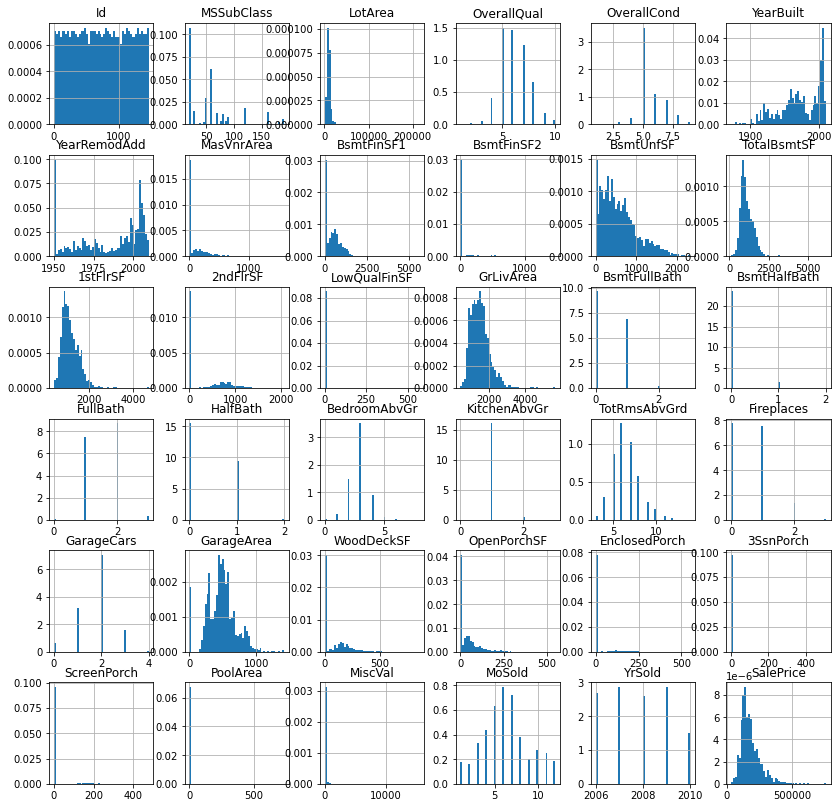

In [88]:
import matplotlib.pyplot as plt
# ploting hitogram for al the numerical variables in the complete case dataset
data_cca.hist(bins = 50, density = True,figsize =(14,14))
plt.show()

<AxesSubplot:>

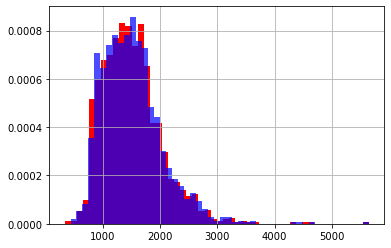

In [91]:
# Looking at the distribution of few important variables before and after drop
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
data['GrLivArea'].hist(bins = 50, ax = ax, density = True, color = 'red')
data_cca['GrLivArea'].hist(bins = 50, ax = ax, density = True, color = 'blue', alpha = 0.7)

<AxesSubplot:ylabel='Density'>

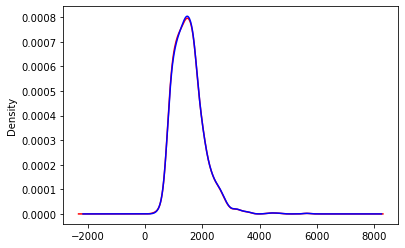

In [94]:
# density plot
# Looking at the distribution of few important variables before and after drop
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
data['GrLivArea'].plot.density(color = 'red')
data_cca['GrLivArea'].plot.density(color = 'blue')
# Distribution is almost identical

In [95]:
# Looking at teh categorical variables for CCA

In [96]:
# the following function captures the percentage of observations for each category in the original & complete case dataset
# put them together in a new dataframe


In [97]:
def categorical_distribution(df, df_cca, variable):
    tmp = pd.concat(
    [
        # percentage of observations per category, original data
        df[variable].value_counts()/len(df),
    # percentage of observations per category, cca data
        df_cca[variable].value_counts()/len(df_cca)
    ],
    axis = 1
    )
    
    # add column names
    tmp.columns = ['original', 'cca']
    return(tmp)

In [98]:
categorical_distribution(data, data_cca, 'MasVnrType')

,original,cca
None,0.591781,0.588527
BrkFace,0.304795,0.310198
Stone,0.087671,0.090652
BrkCmn,0.010274,0.010623


In [2]:
categorical_distribution(data, data_cca, 'BsmtQual')

NameError: name 'categorical_distribution' is not defined

In [1]:
categorical_distribution(data, data_cca, 'SaleCondition')

NameError: name 'categorical_distribution' is not defined

# Mean & Median Imputation

In [108]:
# Using Titanic Dataset
data = pd.read_csv('datasets/titanic/titanic.csv', usecols=['Age', 'Fare','Survived'])

In [109]:
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [110]:
# looking at teh percentage of na
data.isnull().mean()
# Onld variable with missing data is Age

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

### Imputation important
Imputation should be done over the training set, and then propagated to the test set. This means that the mean / median to be used to fill missing values both in train and test set, should be extracted from the train set only. And this is to avoid overfitting.

In [111]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data[['Age', 'Fare']],  # predictors
    data['Survived'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((623, 2), (268, 2))

In [112]:
# Let's explore the missing data in the train set
# the percentages should be fairly similar to those
# of the whole dataset

X_train.isnull().mean()

Age     0.194222
Fare    0.000000
dtype: float64

In [113]:
# let's make a function to fill missing values with the mean or median:
# the variable takes the dataframe, the variable, and the value of the
# mean or median
# and returns the variable with the filled na


def impute_na(df, variable, mean_median):

    return df[variable].fillna(mean_median)

In [115]:
# calculate the median Age

median = X_train.Age.median()
median

29.0

In [118]:
# calculate the mean Age

mean = X_train.Age.mean()
mean

29.915338645418327

In [120]:
# create a new variable with the missing values replaced
# using the function we created above

# first replace with the median
X_train['Age_median'] = impute_na(X_train, 'Age', median)

# now replace with the mean
X_train['Age_mean'] = impute_na(X_train, 'Age', mean)

# the mean contains many decimals, so I round to 1
# using the round function from numpy
X_train['Age_mean'] = np.round(X_train['Age_mean'], 1)

X_train.head(15)

,Age,Fare,Age_median,Age_mean
857,51.0,26.5500,51.0,51.0
52,49.0,76.7292,49.0,49.0
386,1.0,46.9000,1.0,1.0
124,54.0,77.2875,54.0,54.0
578,NaN,14.4583,29.0,29.9
549,8.0,36.7500,8.0,8.0
118,24.0,247.5208,24.0,24.0
12,20.0,8.0500,20.0,20.0
157,30.0,8.0500,30.0,30.0
127,24.0,7.1417,24.0,24.0


In [123]:
# we can see a change in the variance after mean / median imputation
# this is expected, because the percentage of missing data is quite
# high in Age, ~20%
# As expected, the variance is underestimated, because now many values are the same ==> either the mean or the median value.



print('Original variable variance: ', X_train['Age'].var())
print('Variance after median imputation: ', X_train['Age_median'].var())
print('Variance after mean imputation: ', X_train['Age_mean'].var())

Original variable variance:  210.45286924636747
Variance after median imputation:  169.64401397346137
Variance after mean imputation:  169.51269265508222


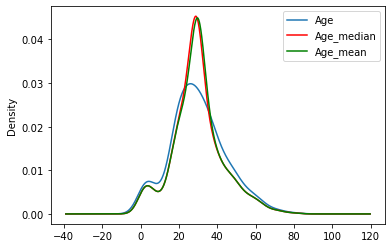

In [125]:
# we can see that the distribution has changed 
# with now more values accumulating towards the median
# or mean

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

As mentioned above, the mean / median imputation distorts the original distribution of the variable Age. The transformed variable shows more values around the mean / median values.

Is this important?

It depends on the machine learning model you want to build. Linear models assume that the variables are normally distributed. Mean / median imputation may distort the original normal distribution if the % of missing data is high. Therefore the final imputed variable will no longer be normally distributed, which in turn may affect the linear model performance.

In [127]:
# we also said that mean / median imputation may affect the relationship 
# with the other variables in the dataset, let's have a look

X_train[['Fare', 'Age', 'Age_median', 'Age_mean']].cov()
#We see indeed that the covariance between Age and Fare is changed after the mean / median imputation.

,Fare,Age,Age_median,Age_mean
Fare,2328.801583,78.468894,64.684488,63.223925
Age,78.468894,210.452869,210.452869,210.452848
Age_median,64.684488,210.452869,169.644014,169.514865
Age_mean,63.223925,210.452848,169.514865,169.512693


<AxesSubplot:>

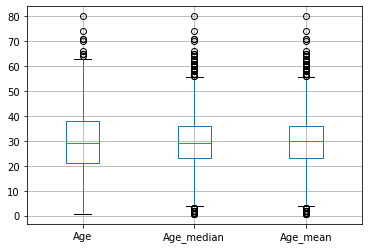

In [128]:
# Finally, I mentioned that mean / median imputation may lead 
# to observations that are normal, to look like outliers

# or in other words, mean / median imputation may lead to an increase
# in the apparent number of  outliers
#   “maximum”: Q3 + 1.5*IQR
#   “minimum”: Q1 -1.5*IQR

# Let's find out using a boxplot
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

From the boxplot above, we can see that after the imputation not only we have more outliers on the higher Age values, but we have now outliers as well for the lower values of Age.

Is this important?

If we are after true outliers, we need to keep this behaviour in mind, to make sure that we are neither masking nor creating artificial outliers with our imputation technique. In practice, we normally don't check for this behaviour at all. But I think it is important to know that is happening.

# House Price Dataset
Let's repeat the exercise in the House Prices dataset from. In this dataset, there are variables with a lot or with few missing data. Therefore we can compare the effect of mean / median imputation in both scenarios.

In [129]:
# we are going to use only the following variables,
# 3 of which contain NA

cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

In [130]:
# let's load the House Prices dataset

data = pd.read_csv('datasets/houseprice/train.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [131]:
# print the variables that contain missing data

# in the next list comprehension, I loop over all the columns
# of the dataset and select those that contain missing data

[var for var in data.columns if data[var].isnull().sum() > 0]

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [132]:
# find the percentage of missing data within those variables
# same code as we learnt in section 3 on variable characteristics

data[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
dtype: float64

### Remember that the mean and the median that we will use to replace the NA needs to be calculated in the train set and propagated to the test set.

In [133]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 10), (438, 10))

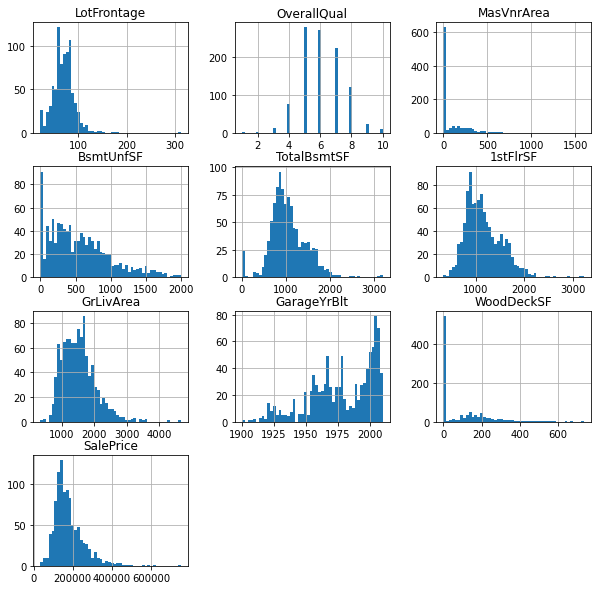

In [134]:
# let's plot the distributions of the variables
# we learnt this code in section 3 on variable characteristics

X_train.hist(bins=50, figsize=(10,10))
plt.show()

In [136]:
# create a new variable with the missing values replaced
# by the median using the function we created above

# I repeat the following lines for each of the variables with NA
# over the next cells

median = X_train['LotFrontage'].median()

X_train.loc[:,'LotFrontage_median'] = impute_na(X_train, 'LotFrontage', median)
X_test.loc[:,'LotFrontage_median'] = impute_na(X_test, 'LotFrontage', median)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [137]:
median = X_train['MasVnrArea'].median()

X_train.loc[:,'MasVnrArea_median'] = impute_na(X_train, 'MasVnrArea', median)
X_test.loc[:,'MasVnrArea_median'] = impute_na(X_test, 'MasVnrArea', median)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


In [138]:
median = X_train['GarageYrBlt'].median()

X_train.loc[:, 'GarageYrBlt_median'] = impute_na(X_train, 'GarageYrBlt', median)
X_test.loc[:,'GarageYrBlt_median'] = impute_na(X_test, 'GarageYrBlt', median)

In [139]:
X_train

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice,LotFrontage_median,MasVnrArea_median,GarageYrBlt_median
64,NaN,7,573.0,318,1057,1057,2034,1998.0,576,219500,69.0,573.0,1998.0
682,NaN,6,0.0,288,1291,1291,1291,1996.0,307,173000,69.0,0.0,1996.0
960,50.0,5,0.0,162,858,858,858,NaN,117,116500,50.0,0.0,1979.0
1384,60.0,6,0.0,356,560,698,1258,1939.0,0,105000,60.0,0.0,1939.0
1100,60.0,2,0.0,0,290,438,438,1930.0,0,60000,60.0,0.0,1930.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,82.0,8,673.0,89,1252,1268,2365,1999.0,0,337000,82.0,673.0,1999.0
835,60.0,4,0.0,625,1067,1067,1067,1996.0,290,128000,60.0,0.0,1996.0
1216,68.0,6,0.0,0,0,1318,1902,1978.0,0,112000,68.0,0.0,1978.0
559,NaN,7,18.0,1374,1374,1557,1557,2003.0,143,234000,69.0,18.0,2003.0


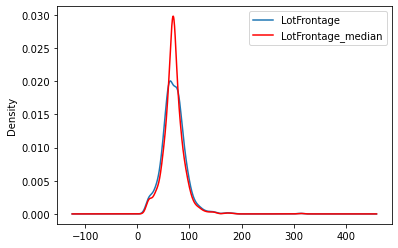

In [140]:

# let's evaluate the effect of median imputation on the distribution

# we can see that the distribution has changed for LotFrontAge
# with now more values accumulating towards the median

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['LotFrontage'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['LotFrontage_median'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

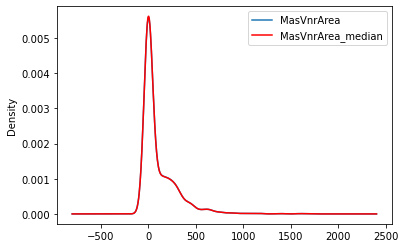

In [141]:

# For MasVnrArea, because the percentage of missing data
# was low, we don't expect and won't see a dramatic change in the
# original distribution of the variable

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['MasVnrArea'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['MasVnrArea_median'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

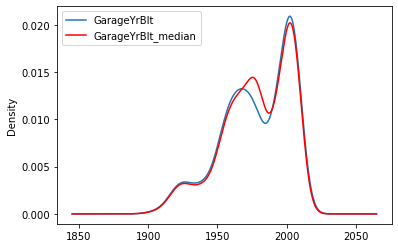

In [148]:
# similarly, for GarageBlt, because the percentage of missing data
# was low, we don't expect a massive change in the
# original distribution of the variable, however we see more values
# at around the median

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['GarageYrBlt'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['GarageYrBlt_median'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [149]:
# similarly we can explore the effect of the imputation technique on 
# the variance

# we can see a change in the variance after imputation for LotFrontAge
# this is expected, because the percentage of missing data is quite
# high ~20%

print('Original Variance: ', X_train['LotFrontage'].var())
print('Variance after median imputation: ', X_train['LotFrontage_median'].var())

Original Variance:  532.5872021885676
Variance after median imputation:  434.06604265416564


In [150]:
# this is not the case for MasnVnrArea, because the % of missing data was small
print('Original Variance: ', X_train['MasVnrArea'].var())
print('Variance after median imputation: ', X_train['MasVnrArea_median'].var())

Original Variance:  32983.538710039466
Variance after median imputation:  32874.27007404175


In [151]:
# for GarageBlt, the % of missing data was small so the effect
# on the variance will also be small

print('Original Variance: ', X_train['GarageYrBlt'].var())
print('Variance after median imputation: ', X_train['GarageYrBlt_median'].var())

Original Variance:  624.3059475074134
Variance after median imputation:  591.3356883144767


In [152]:
# finally, let's explore the covariance:
# take your time to compare the values in the table below.
# see how the covariance is affected for LotFrontAge but not
# so much for the other 2 variables

X_train.cov()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice,LotFrontage_median,MasVnrArea_median,GarageYrBlt_median
LotFrontage,532.587202,6.587119,6.805603e+02,9.496573e+02,2.908856e+03,3.379794e+03,3.919952e+03,30.611717,1.347414e+02,6.689645e+05,532.587202,6.744233e+02,28.095264
OverallQual,6.587119,1.843859,1.014970e+02,1.746147e+02,2.886241e+02,2.242973e+02,4.091242e+02,17.902809,3.168557e+01,8.320132e+04,5.384774,1.005330e+02,16.875386
MasVnrArea,680.560330,101.496976,3.298354e+04,7.540788e+03,2.478877e+04,2.086595e+04,3.520785e+04,1203.583792,3.208924e+03,6.836439e+06,553.921303,3.298354e+04,1134.380889
BsmtUnfSF,949.657293,174.614725,7.540788e+03,1.875241e+05,7.513307e+04,4.987449e+04,5.203392e+04,1823.065167,-1.833201e+03,6.833028e+06,788.095358,7.472110e+03,1724.141544
TotalBsmtSF,2908.855504,288.624075,2.478877e+04,7.513307e+04,1.682931e+05,1.212079e+05,8.615192e+04,3173.042442,1.227966e+04,2.003928e+07,2370.929189,2.465436e+04,2989.473391
1stFlrSF,3379.793504,224.297266,2.086595e+04,4.987449e+04,1.212079e+05,1.398656e+05,1.044401e+05,2009.195552,1.109406e+04,1.783631e+07,2750.747094,2.080136e+04,1890.271636
GrLivArea,3919.951834,409.124216,3.520785e+04,5.203392e+04,8.615192e+04,1.044401e+05,2.681277e+05,2738.982988,1.558395e+04,2.934477e+07,3189.685753,3.496714e+04,2576.345636
GarageYrBlt,30.611717,17.902809,1.203584e+03,1.823065e+03,3.173042e+03,2.009196e+03,2.738983e+03,624.305948,6.658911e+02,9.309355e+05,24.755173,1.182673e+03,624.305948
WoodDeckSF,134.741376,31.685571,3.208924e+03,-1.833201e+03,1.227966e+04,1.109406e+04,1.558395e+04,665.891118,1.648582e+04,3.029981e+06,106.009105,3.212101e+03,627.624634
SalePrice,668964.454191,83201.317781,6.836439e+06,6.833028e+06,2.003928e+07,1.783631e+07,2.934477e+07,930935.489321,3.029981e+06,6.105731e+09,544838.836893,6.790442e+06,877485.418108


<AxesSubplot:>

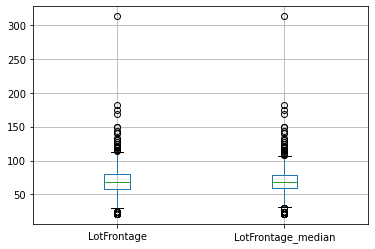

In [153]:
# Finally, let's explore the knock-on effect on outliers

# there is a decrease in the outlier boundaries for LotFrontage
# (look at the height of the top whisker)
# but not a visible effect for the other 2 variables

X_train[['LotFrontage', 'LotFrontage_median']].boxplot()

<AxesSubplot:>

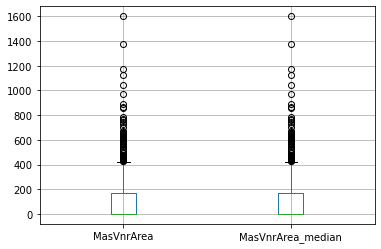

In [154]:
X_train[['MasVnrArea', 'MasVnrArea_median']].boxplot()

<AxesSubplot:>

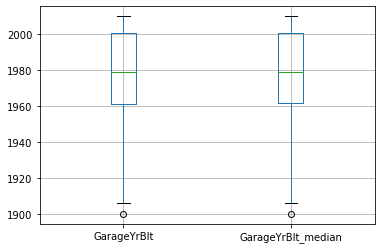

In [155]:
X_train[['GarageYrBlt', 'GarageYrBlt_median']].boxplot()

In [156]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# these are the objects we need to impute missing data
# with sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# to split the datasets
from sklearn.model_selection import train_test_split

In [157]:
# 3 of which contain NA

cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

In [158]:
# let's load the House Prices dataset

data = pd.read_csv('datasets/houseprice/train.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [159]:
# let's check the null values
data.isnull().mean()

LotFrontage    0.177397
OverallQual    0.000000
MasVnrArea     0.005479
BsmtUnfSF      0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
GarageYrBlt    0.055479
WoodDeckSF     0.000000
SalePrice      0.000000
dtype: float64

The variables LotFrontage, MasVnrArea and GarageYrBlt contain missing data.

In [160]:
# let's separate into training and testing set

# first let's remove the target from the features
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use], # just the features
                                                    data['SalePrice'], # the target
                                                    test_size=0.3, # the percentage of obs in the test set
                                                    random_state=0) # for reproducibility
X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [161]:
# let's check the misssing data again
X_train.isnull().mean()

OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
GarageYrBlt    0.052838
dtype: float64

In [162]:
# Now we impute the missing values with SimpleImputer

# create an instance of the simple imputer
# we indicate that we want to impute with a constant
# arbitrary value: 999
imputer = SimpleImputer(strategy='constant', 
                       fill_value = 999)

# we fit the imputer to the train set
# the imputer assigns 999 to all variables
imputer.fit(X_train)

SimpleImputer(fill_value=999, strategy='constant')

For arbitrary value imputation, we need to set the strategy to 'constant' and indicate the arbitrary value in the fill_value argument.

In [163]:
# we can look at the learnt imputation values like this:
imputer.statistics_

array([999., 999., 999., 999., 999., 999., 999., 999., 999.])

In [164]:
imputer1 = SimpleImputer(strategy='constant', 
                       fill_value = 999)

In [166]:
imputer1.fit(X_train)
imputer1.statistics_

array([999., 999., 999., 999., 999., 999., 999., 999., 999.])

In [167]:

# NOTE: the data is returned as a numpy array!!!
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train

array([[   7., 1057., 1057., ...,  999.,  573., 1998.],
       [   6., 1291., 1291., ...,  999.,    0., 1996.],
       [   5.,  858.,  858., ...,   50.,    0.,  999.],
       ...,
       [   6.,    0., 1318., ...,   68.,    0., 1978.],
       [   7., 1374., 1557., ...,  999.,   18., 2003.],
       [   7., 1195., 1195., ...,   58.,   30., 1998.]])

In [168]:
# we can transform it back to a dataframe:

X_train = pd.DataFrame(X_train, columns=cols_to_use)
X_train.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,WoodDeckSF,BsmtUnfSF,LotFrontage,MasVnrArea,GarageYrBlt
0,7.0,1057.0,1057.0,2034.0,576.0,318.0,999.0,573.0,1998.0
1,6.0,1291.0,1291.0,1291.0,307.0,288.0,999.0,0.0,1996.0
2,5.0,858.0,858.0,858.0,117.0,162.0,50.0,0.0,999.0
3,6.0,560.0,698.0,1258.0,0.0,356.0,60.0,0.0,1939.0
4,2.0,290.0,438.0,438.0,0.0,0.0,60.0,0.0,1930.0


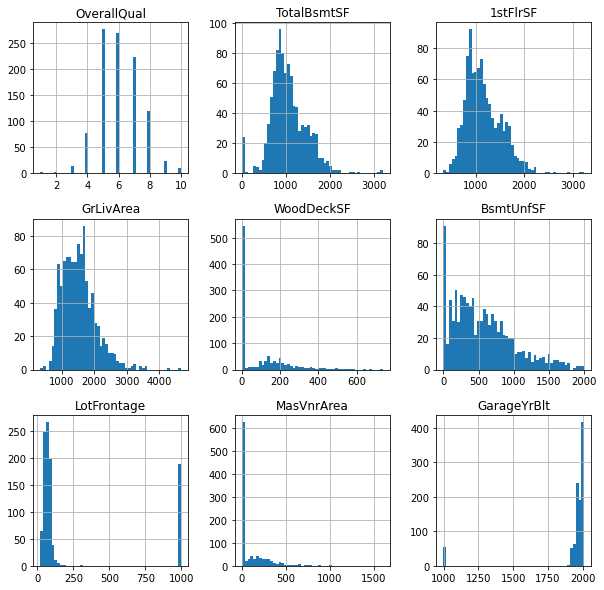

In [169]:
# Let's explore the distributions after the imputation

X_train.hist(bins=50, figsize=(10,10))
plt.show()

Note the tall bar at 999 in the LotFrontage's histogram, which appeared after the imputation. You can also see the imputation effect on GarageYrBlt, with the bar at the far left right at the 999 value.

Remember to be cautious with the order in which you pass the column names as we discussed in the previous notebook.

SimpleImputer: different procedures on different features
On occasions, we want to implement different imputation techniques to different features, how can we do this using the SimpleImputer from Scikit-learn?

We need to use another class called ColumnTransformer.

Note ColumnTransformer has been recently released by Scikit-learn and it is therefore in beta version. This means that the developers can change the way it is used, or remove it altogether any time. The implication is that the code you write today, may not be useful after new releases from Scikit-learn. That is usually what happens with any open-source package when the developers are trying new functionality.

More details about the ColumnTransformer in the Sklearn website

In [170]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 9), (438, 9))

In [171]:
# let's look at the missing values
X_train.isnull().mean()

OverallQual    0.000000
TotalBsmtSF    0.000000
1stFlrSF       0.000000
GrLivArea      0.000000
WoodDeckSF     0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
GarageYrBlt    0.052838
dtype: float64

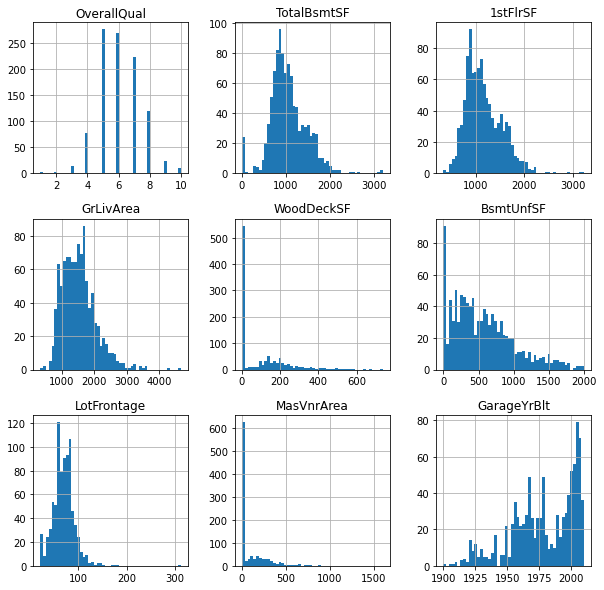

In [172]:

# let's look at the distributions of the variables to decide
# which arbitrary value to use for each feature

X_train.hist(bins=50, figsize=(10,10))
plt.show()

In [173]:
# first we need to make lists, indicating which features
# will be imputed with each value

features_LotFrontAge = ['LotFrontage']
features_MasVnrArea = ['MasVnrArea']
features_GarageYrBlt = ['GarageYrBlt']

# then we put the features list and the transformers together
# using the column transformer

# in this example, I will use the default parameter of ColumnTransformer
# remainder = drop, which means that only the imputed features will
# be retained, and the rest dropped

preprocessor = ColumnTransformer(transformers=[
    ('imputer_LotFrontAge', SimpleImputer(
        strategy='constant', fill_value=999), features_LotFrontAge),
    ('imputer_MasVnrArea', SimpleImputer(
        strategy='constant', fill_value=-10), features_MasVnrArea),
    ('imputer_GarageYrBlt', SimpleImputer(
        strategy='constant', fill_value=1700), features_GarageYrBlt)
], remainder='drop')

In [174]:
# now we fit the preprocessor
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('imputer_LotFrontAge',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['LotFrontage']),
                                ('imputer_MasVnrArea',
                                 SimpleImputer(fill_value=-10,
                                               strategy='constant'),
                                 ['MasVnrArea']),
                                ('imputer_GarageYrBlt',
                                 SimpleImputer(fill_value=1700,
                                               strategy='constant'),
                                 ['GarageYrBlt'])])

In [175]:
# we can explore the transformers like this:

preprocessor.transformers

[('imputer_LotFrontAge',
  SimpleImputer(fill_value=999, strategy='constant'),
  ['LotFrontage']),
 ('imputer_MasVnrArea',
  SimpleImputer(fill_value=-10, strategy='constant'),
  ['MasVnrArea']),
 ('imputer_GarageYrBlt',
  SimpleImputer(fill_value=1700, strategy='constant'),
  ['GarageYrBlt'])]

In [176]:
# and we can look at the parameters learnt like this:

# for LotFrontAge
preprocessor.named_transformers_['imputer_LotFrontAge'].statistics_

array([999.])

In [177]:

# for MasVnrArea

preprocessor.named_transformers_['imputer_MasVnrArea'].statistics_

array([-10.])

In [178]:
# for GarageYrBlt

preprocessor.named_transformers_['imputer_GarageYrBlt'].statistics_

array([1700.])

In [179]:
# and now we can impute the data
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

X_train

array([[ 999.,  573., 1998.],
       [ 999.,    0., 1996.],
       [  50.,    0., 1700.],
       ...,
       [  68.,    0., 1978.],
       [ 999.,   18., 2003.],
       [  58.,   30., 1998.]])

Observe how the returned data contains only 3 variables, the ones for which we specified imputation values. This is the effect of specifying remainder='drop' in the columnTransformer.

ANOTHER NOTE OF CAUTION

ColumnTransformer is in essence just slicing the dataframe in the required features. Then the SimpleImputer operates on the sliced dataframe. If different features are required by the different imputation methods, it will slice the dataframe on the required features for each imputation, and then concatenate them to produce the final output.

For our specific example, what happens is the following:

ColumnTransformer first creates 3 single column dataframes, one with each of the indicated variables
The SimpleImputers learn the parameters in their respective sliced dataframes
In this case they don't learn anything, because we hard code the arbitrary value
ColunmnTransformer contatenates back the 3 single column dataframes into the final result, which is a 3 column dataframe
So note that you will not get all the variables from the original X_train, unless you create imputers for all the variables!!

Also, there is a risk of messing up with the order of the features, if we do not use the transformers within a pipeline or we do not keep an eye on the order of the features in the train set, before they were converted to numpy arrays.

In [180]:
# see how the result of the imputation is a 3 column dataset
pd.DataFrame(X_train,
             columns=features_LotFrontAge + features_MasVnrArea +
             features_GarageYrBlt).head()

,LotFrontage,MasVnrArea,GarageYrBlt
0,999.0,573.0,1998.0
1,999.0,0.0,1996.0
2,50.0,0.0,1700.0
3,60.0,0.0,1939.0
4,60.0,0.0,1930.0


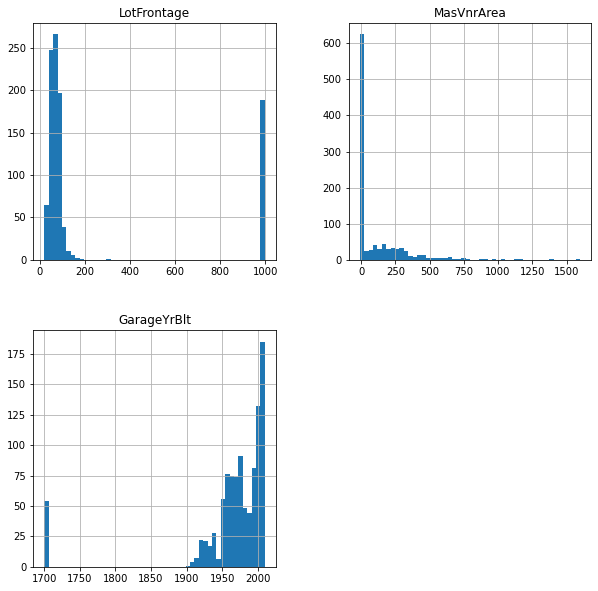

In [181]:
X_train = pd.DataFrame(X_train,
             columns=features_LotFrontAge + features_MasVnrArea +
             features_GarageYrBlt)

X_train.hist(bins=50, figsize=(10,10))
plt.show()

# Frequent category imputation with Scikit-learn ==> SimpleImputer

In [182]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# these are the objects we need to impute missing data
# with sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# to split the datasets
from sklearn.model_selection import train_test_split

In [183]:
# we use only the following variables for the demo:
# a mix of categorical and numerical

cols_to_use = ['BsmtQual', 'FireplaceQu', 'MSZoning',
               'BsmtUnfSF', 'LotFrontage', 'MasVnrArea',
               'Street', 'Alley', 'SalePrice']

In [184]:
# let's load the House Prices dataset

data = pd.read_csv('datasets/houseprice/train.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 9)


,MSZoning,LotFrontage,Street,Alley,MasVnrArea,BsmtQual,BsmtUnfSF,FireplaceQu,SalePrice
0,RL,65.0,Pave,NaN,196.0,Gd,150,NaN,208500
1,RL,80.0,Pave,NaN,0.0,Gd,284,TA,181500
2,RL,68.0,Pave,NaN,162.0,Gd,434,TA,223500
3,RL,60.0,Pave,NaN,0.0,TA,540,Gd,140000
4,RL,84.0,Pave,NaN,350.0,Gd,490,TA,250000


In [185]:
# let's check the null values
data.isnull().mean()

MSZoning       0.000000
LotFrontage    0.177397
Street         0.000000
Alley          0.937671
MasVnrArea     0.005479
BsmtQual       0.025342
BsmtUnfSF      0.000000
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

In [186]:
# let's separate into training and testing set

# first let's remove the target from the features
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use], # just the features
                                                    data['SalePrice'], # the target
                                                    test_size=0.3, # the percentage of obs in the test set
                                                    random_state=0) # for reproducibility
X_train.shape, X_test.shape

((1022, 8), (438, 8))

In [187]:
# let's check the misssing data again
X_train.isnull().mean()

BsmtQual       0.023483
FireplaceQu    0.467710
MSZoning       0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
Street         0.000000
Alley          0.939335
dtype: float64

# SimpleImputer on the entire dataset


In [188]:
# Now we impute the missing values with SimpleImputer

# create an instance of the simple imputer
# we indicate that we want to impute with the 
# most frequent category

imputer = SimpleImputer(strategy='most_frequent')

# we fit the imputer to the train set
# the imputer will learn the mode of ALL variables
# categorical or not
imputer.fit(X_train[cols_to_use])

SimpleImputer(strategy='most_frequent')

In [189]:
# we can look at the learnt frequent values like this:
imputer.statistics_

array(['TA', 'Gd', 'RL', 0, 60.0, 0.0, 'Pave', 'Pave'], dtype=object)

Note that the transformer learns the most frequent value for both categorical AND numerical variables.

In [190]:
# and we can investigate the frequent values to corroborate
# the imputer did a good job
X_train[cols_to_use].mode()

,BsmtQual,FireplaceQu,MSZoning,BsmtUnfSF,LotFrontage,MasVnrArea,Street,Alley
0,TA,Gd,RL,0,60.0,0.0,Pave,Pave


In [191]:
# and now we impute the train and test set

# NOTE: the data is returned as a numpy array!!!
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

X_train

array([['Gd', 'Gd', 'RL', ..., 573.0, 'Pave', 'Pave'],
       ['Gd', 'Gd', 'RL', ..., 0.0, 'Pave', 'Pave'],
       ['TA', 'Gd', 'RL', ..., 0.0, 'Pave', 'Pave'],
       ...,
       ['TA', 'Gd', 'RM', ..., 0.0, 'Pave', 'Pave'],
       ['Gd', 'TA', 'RL', ..., 18.0, 'Pave', 'Pave'],
       ['Gd', 'Gd', 'RL', ..., 30.0, 'Pave', 'Pave']], dtype=object)

In [192]:
# encode the train set back to a dataframe:

pd.DataFrame(X_train, columns=cols_to_use).head()

,BsmtQual,FireplaceQu,MSZoning,BsmtUnfSF,LotFrontage,MasVnrArea,Street,Alley
0,Gd,Gd,RL,318,60,573,Pave,Pave
1,Gd,Gd,RL,288,60,0,Pave,Pave
2,TA,Gd,RL,162,50,0,Pave,Pave
3,TA,Gd,RL,356,60,0,Pave,Pave
4,TA,Gd,RL,0,60,0,Pave,Pave


# SimpleImputer: different procedures on different feature

In [193]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 8), (438, 8))

In [194]:
# let's look at the missing values
X_train.isnull().mean()

BsmtQual       0.023483
FireplaceQu    0.467710
MSZoning       0.000000
BsmtUnfSF      0.000000
LotFrontage    0.184932
MasVnrArea     0.004892
Street         0.000000
Alley          0.939335
dtype: float64

For this demo, I will impute:

categorical variables with the frequent category
numerical variables with the mean.

In [195]:
# first we need to make lists, indicating which features
# will be imputed with each method

features_numeric = ['BsmtUnfSF', 'LotFrontage', 'MasVnrArea', ]
features_categoric = ['BsmtQual', 'FireplaceQu', 'MSZoning',
                      'Street', 'Alley']

# then we put the features list and the transformers together
# using the column transformer

preprocessor = ColumnTransformer(transformers=[
    ('numeric_imputer', SimpleImputer(strategy='mean'), features_numeric),
    ('categoric_imputer', SimpleImputer(strategy='most_frequent'), features_categoric)
])

In [196]:
# now we fit the preprocessor
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('numeric_imputer', SimpleImputer(),
                                 ['BsmtUnfSF', 'LotFrontage', 'MasVnrArea']),
                                ('categoric_imputer',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['BsmtQual', 'FireplaceQu', 'MSZoning',
                                  'Street', 'Alley'])])

In [197]:
# we can explore the transformers like this:

preprocessor.transformers

[('numeric_imputer',
  SimpleImputer(),
  ['BsmtUnfSF', 'LotFrontage', 'MasVnrArea']),
 ('categoric_imputer',
  SimpleImputer(strategy='most_frequent'),
  ['BsmtQual', 'FireplaceQu', 'MSZoning', 'Street', 'Alley'])]

In [198]:
# and we can look at the parameters learnt like this:

# for the mean imputer
preprocessor.named_transformers_['numeric_imputer'].statistics_

array([565.99217221,  69.66866747, 103.55358899])

In [199]:
# and we can corroborate the value with that one in
# the train set
X_train[features_numeric].mean()

BsmtUnfSF      565.992172
LotFrontage     69.668667
MasVnrArea     103.553589
dtype: float64

In [200]:
# for frequent category imputer

preprocessor.named_transformers_['categoric_imputer'].statistics_

array(['TA', 'Gd', 'RL', 'Pave', 'Pave'], dtype=object)

In [201]:
# and we corroborate those values in the train set

X_train[features_categoric].mode()

,BsmtQual,FireplaceQu,MSZoning,Street,Alley
0,TA,Gd,RL,Pave,Pave


In [202]:
# and now we can impute the data
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

In [203]:
X_train.shape

(1022, 8)

In [204]:
# see how the result of the imputation is a 3 column dataset
pd.DataFrame(X_train,
             columns=features_numeric + features_categoric).head()

,BsmtUnfSF,LotFrontage,MasVnrArea,BsmtQual,FireplaceQu,MSZoning,Street,Alley
0,318,69.6687,573,Gd,Gd,RL,Pave,Pave
1,288,69.6687,0,Gd,Gd,RL,Pave,Pave
2,162,50,0,TA,Gd,RL,Pave,Pave
3,356,60,0,TA,Gd,RL,Pave,Pave
4,0,60,0,TA,Gd,RL,Pave,Pave
